# Load Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans



# Load dataset

In [4]:
data=pd.read_csv("/kaggle/input/laptop-price/laptop_price.csv", encoding="latin-1")

In [5]:
data.head(150)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,148,Asus,ZenBook UX430UA,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.25kg,1099.00
146,149,HP,EliteBook Folio,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,0.97kg,2014.00
147,150,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.00
148,151,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,2029.00


In [6]:
data.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [7]:
# Displays all the data types of the columns in df
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [8]:
# shows non-null values and dtypes in a single 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
data.shape

(1303, 13)

In [10]:
data.isnull()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#To find the percentage of missing data in the dataframe for each column
data.isnull().sum()*100/len(data)

laptop_ID           0.0
Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

# Data Preprocessing

In [13]:
#remove gb and kg from Ram and weight ,and convert the cols to numeric
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')

In [14]:

data = data.rename(columns={"Price_euros": "Price"})
data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [15]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [16]:
def findXresolution(s):
    return s.split()[-1].split('x')[0]
def findYresolution(s):
    return s.split()[-1].split('x')[1]

In [17]:
#finding the x_res and y_res from screen resolution 
data['x_res']=data['ScreenResolution'].apply(lambda x:findXresolution(x))
data['y_res']=data['ScreenResolution'].apply(lambda y:findYresolution(y))
#convert to numeric
data['x_res']=data['x_res'].astype('int')
data['y_res']=data['y_res'].astype('int')

In [18]:
data['PPI'] = (((data['x_res']**2) + (data['y_res']**2))**0.5 / data['Inches']).astype('float')

data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
x_res          0.556529
y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
laptop_ID      0.067830
Name: Price, dtype: float64

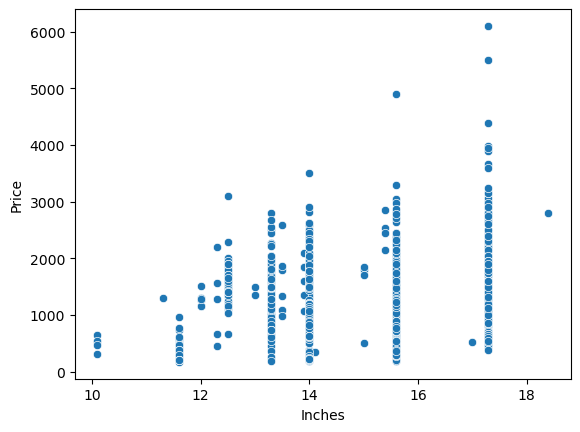

In [19]:
sns.scatterplot(x=data['Inches'],y=data['Price'])
plt.show()

In [20]:
data.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [21]:
#first we will extract name of cpu ehich is first 3 words from cpu column and then we will check which processor it is 
def fetch_processor(x):
    cpu_name=" ".join(x.split()[0:3])
    if cpu_name=='Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    
data['Cpu_brand']=data['Cpu'].apply(lambda x:fetch_processor(x))    


In [22]:
data['Memory'] = data['Memory'].astype(str).replace('.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')
new = data['Memory'].str.split('+', n=1, expand=True)
data['first'] = new[0]
data['first'] = data['first'].str.strip()
data['second'] = new[1]
data['Layer1HDD'] = data['first'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x: 1 if 'SSD' in x else 0)
data["Layer1Hybrid"] = data['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
data['first'] = data['first'].str.replace(r'D', '')
data['second'].fillna('0', inplace=True)
data['Layer2HDD'] = data['second'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if 'SSD' in x else 0)
data["Layer2Hybrid"] = data['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
data['second'] = data['second'].str.replace(r'D', '')
#binary encoding
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#only keep integert(digits)
data['second'] = data['second'].str.replace(r'D', '')

import pandas as pd

# Extract numeric values from 'first' and 'second' columns
data['first'] = data['first'].str.extract('(\d+)', expand=False)
data['second'] = data['second'].str.extract('(\d+)', expand=False)

# Convert to numeric
data['first'] = pd.to_numeric(data['first'], errors='coerce')
data['second'] = pd.to_numeric(data['second'], errors='coerce')



In [23]:
#finalize the columns by keeping value
data['HDD']=(data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD']=(data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid']=(data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_Storage']=(data['first']*data['Layer1Flash_Storage']+data['second']*data['Layer2Flash_Storage'])
#drop the unrequired columns
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD','Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)
data.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [24]:
#which brand Gpu is in Laptop
data['brand_Gpu']=data['Gpu'].apply(lambda x:x.split()[0])
data['brand_Gpu'].unique()


array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [25]:
len(data[data['brand_Gpu']=='ARM'])

1

In [26]:
data[data['brand_Gpu']=='ARM'].count()

laptop_ID      1
Company        1
Product        1
TypeName       1
Ram            1
Gpu            1
OpSys          1
Weight         1
Price          1
Touchscreen    1
IPS            1
PPI            1
Cpu_brand      1
HDD            1
SSD            1
brand_Gpu      1
dtype: int64

In [27]:
#there is only 1 row of ARM GPU so remove it
data=data[data['brand_Gpu']!='ARM']
data.drop(columns=['Gpu'],inplace=True)

In [28]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [29]:
#get which os system

def get_os(a):
    if a=='Windows 10'or a=='Windows 10 S'or a=='Windows 7':
        return 'Windows'
    elif a=='macOS'or a=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
data['os']=data['OpSys'].apply(get_os) 


In [30]:
data.drop(columns=['OpSys'],inplace=True)

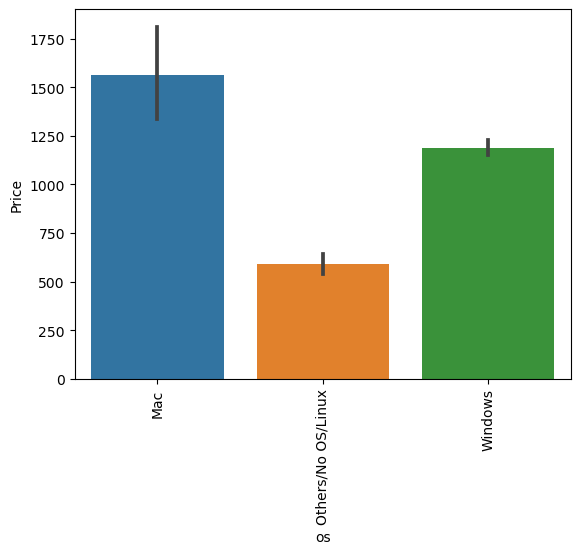

In [31]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Exploratory Data Analysis

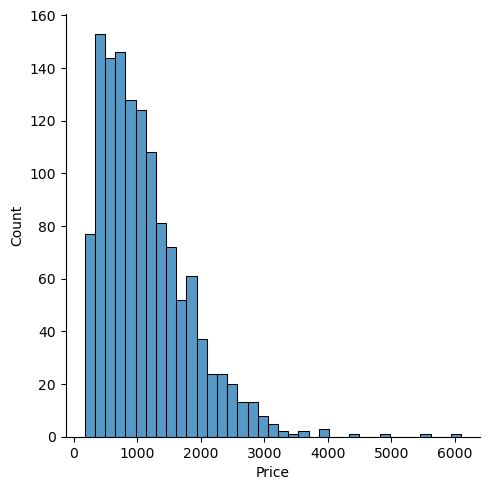

In [32]:
sns.displot(data['Price'])
plt.show()

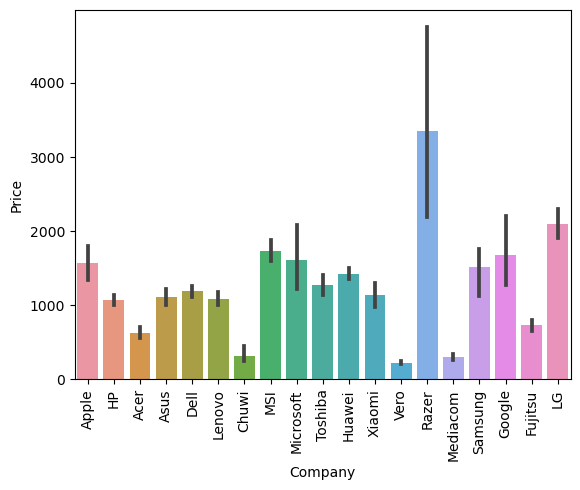

In [33]:
#what is avg price of each brand?
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

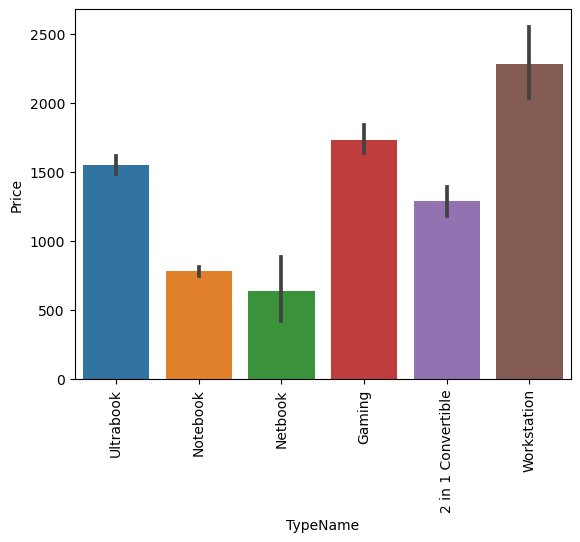

In [34]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
def plot_scatter(data, x_feature, y_feature):
    """
    Plots a scatter plot to visualize the relationship between two features in the dataset.

    Scatter plots are useful for visually exploring the relationship between two continuous variables.
    Each point on the plot represents an observation in the dataset, with its x-coordinate determined by one
    feature and its y-coordinate determined by another feature. Additionally, the points are color-coded based
    on a categorical variable, typically representing different groups or classes.

    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features to be plotted.
        x_feature (str): Name of the feature to plot on the x-axis.
            The feature to be represented along the horizontal axis of the scatter plot.
        y_feature (str): Name of the feature to plot on the y-axis.
            The feature to be represented along the vertical axis of the scatter plot.

    Returns:
        None
    """
    # Set style
    sns.set(style='darkgrid', font_scale=1.2)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_feature], data[y_feature], c=data['Price'].astype('category').cat.codes, cmap='plasma', alpha=0.8, edgecolor='black', s=100)

    # Set title and labels
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}', fontsize=18, fontweight='bold', color='navy')
    plt.xlabel(x_feature, fontsize=14, fontweight='bold', color='green')
    plt.ylabel(y_feature, fontsize=14, fontweight='bold', color='green')

    # Add colorbar
    plt.colorbar(label='Price')

    plt.tight_layout()
    plt.show()


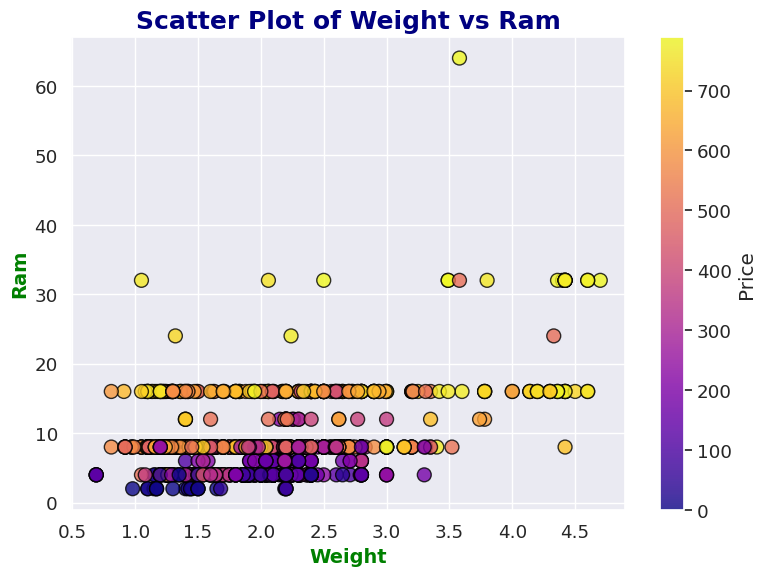

In [40]:
plot_scatter(data, 'Weight', 'Ram')

<Axes: xlabel='Touchscreen', ylabel='Price'>

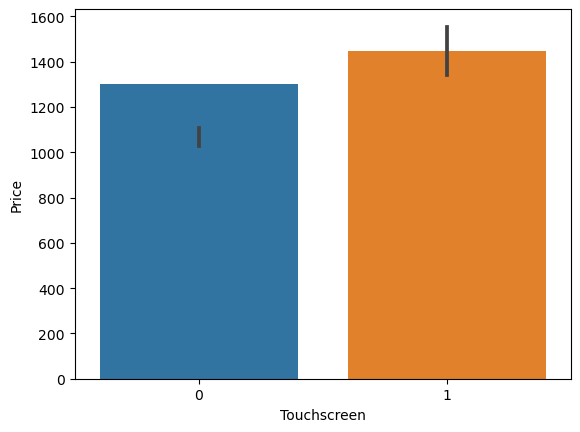

In [34]:
#how many laptops in data are touchscreen
sns.countplot(data['Touchscreen'])
#plot against price
sns.barplot(x=data['Touchscreen'],y=data['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

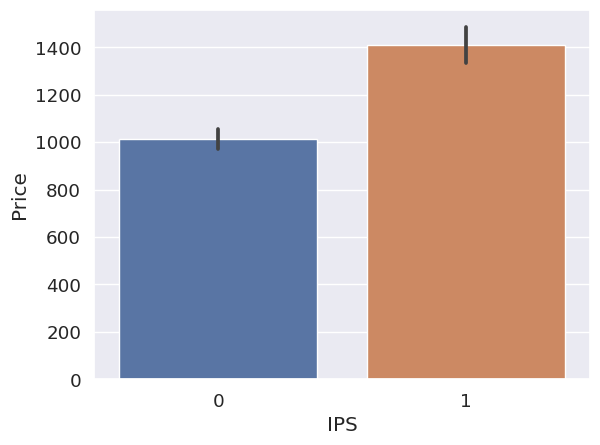

In [41]:
#extract IPS column
sns.barplot(x=data['IPS'],y=data['Price'])

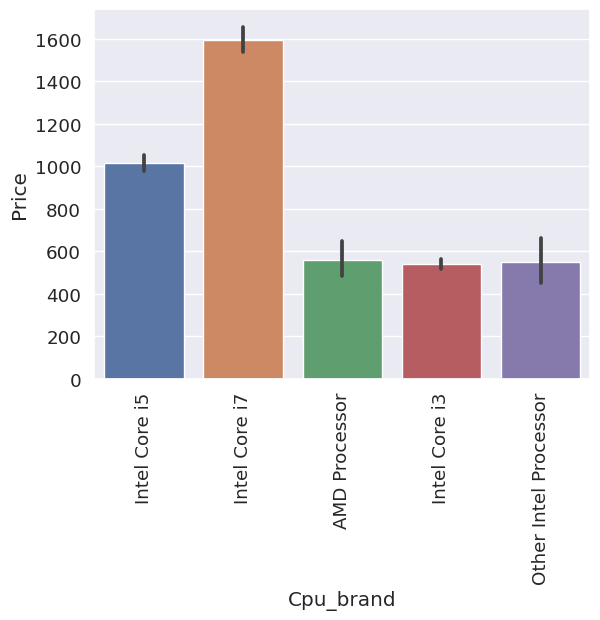

In [42]:
sns.barplot(x=data['Cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()


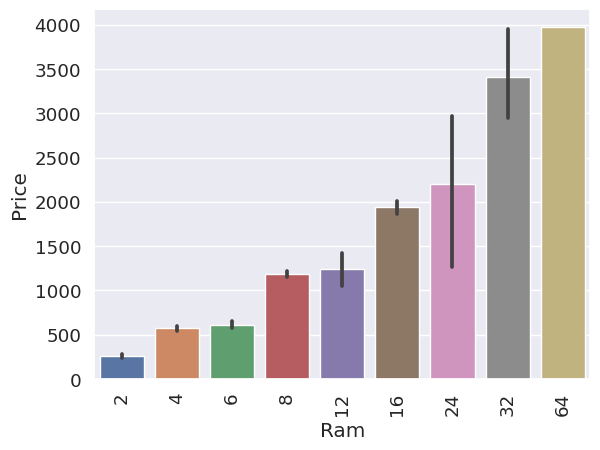

In [43]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
data.dtypes

laptop_ID        int64
Company         object
Product         object
TypeName        object
Ram              int32
Weight         float32
Price          float64
Touchscreen      int64
IPS              int64
PPI            float64
Cpu_brand       object
HDD              int64
SSD              int64
brand_Gpu       object
os              object
dtype: object

## Preprocessing

In [45]:
from sklearn.preprocessing import LabelEncoder

columns = ['Company', 'Product', 'TypeName', 'Cpu_brand', 'brand_Gpu', 'os']
for col in columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])



In [46]:
from tabulate import tabulate
def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(data)


Statistical Moments:

+-------------+----------+----------+----------------------+------------+------------+
|             |   Mean   |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+=============+==========+==========+======================+============+============+
|  laptop_ID  | 659.734  |  658.5   |       381.015        | 0.00579903 |  -1.1957   |
+-------------+----------+----------+----------------------+------------+------------+
|   Company   | 6.43625  |    7     |        4.0788        |  0.379718  | -0.369403  |
+-------------+----------+----------+----------------------+------------+------------+
|   Product   | 307.515  |   290    |       171.638        | 0.0847041  |  -1.08852  |
+-------------+----------+----------+----------------------+------------+------------+
|  TypeName   | 2.58449  |    3     |       1.24365        | -0.750527  | -0.280916  |
+-------------+----------+----------+----------------------+------------+------------+
|     Ram     | 8.38

# Data Splitting

In [47]:
x=data.drop(columns='Price')
y=np.log(data['Price'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    1302 non-null   int64  
 1   Company      1302 non-null   int64  
 2   Product      1302 non-null   int64  
 3   TypeName     1302 non-null   int64  
 4   Ram          1302 non-null   int32  
 5   Weight       1302 non-null   float32
 6   Price        1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   IPS          1302 non-null   int64  
 9   PPI          1302 non-null   float64
 10  Cpu_brand    1302 non-null   int64  
 11  HDD          1302 non-null   int64  
 12  SSD          1302 non-null   int64  
 13  brand_Gpu    1302 non-null   int64  
 14  os           1302 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(11)
memory usage: 152.6 KB


In [51]:
def elbow_plot(x):
    # Initialize lists to store inertia values
    inertia_values = []

    # Test different values of k (number of clusters)
    k_values = range(2, 11)  # Test k from 2 to 10

    for k in k_values:
        # Create KMeans clustering model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x)

        # Append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    #plt.savefig('5.png', dpi=300)
    plt.show()

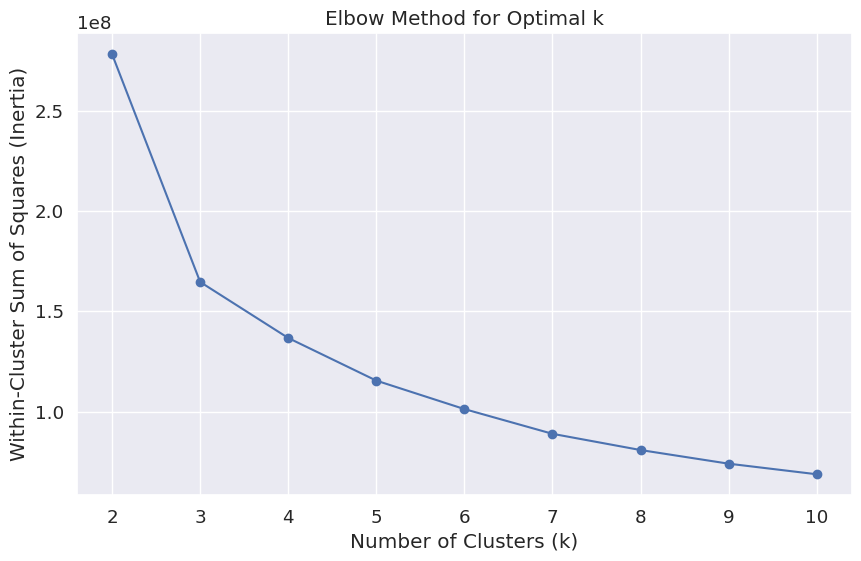

In [52]:
elbow_plot(x)

In [55]:
def KMeans_Clustering(data):
    # Perform K-means clustering
    km = KMeans(n_clusters=4, random_state=42)  # Specify the number of clusters
    data['cluster'] = km.fit_predict(data[['Weight','Price']])  # Fit K-means and assign cluster labels

    # Plot clusters with cluster centers
    plt.figure(figsize=(10, 8))

    # Plot each cluster using a different color
    for cluster_label in sorted(data['cluster'].unique()):
        cluster_data = data[data['cluster'] == cluster_label]
        plt.scatter(cluster_data['Weight'], cluster_data['Price'], label=f'Cluster {cluster_label}', alpha=0.7)

    # Plot cluster centers
    cluster_centers = km.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='blue', label='Cluster Centers')

    # Set plot title and labels
    plt.title('K-means Clustering: Weight vs Price')
    plt.xlabel('Weight')
    plt.ylabel('Price')

    # Add legend
    plt.legend()
    plt.grid(True)
    plt.show()

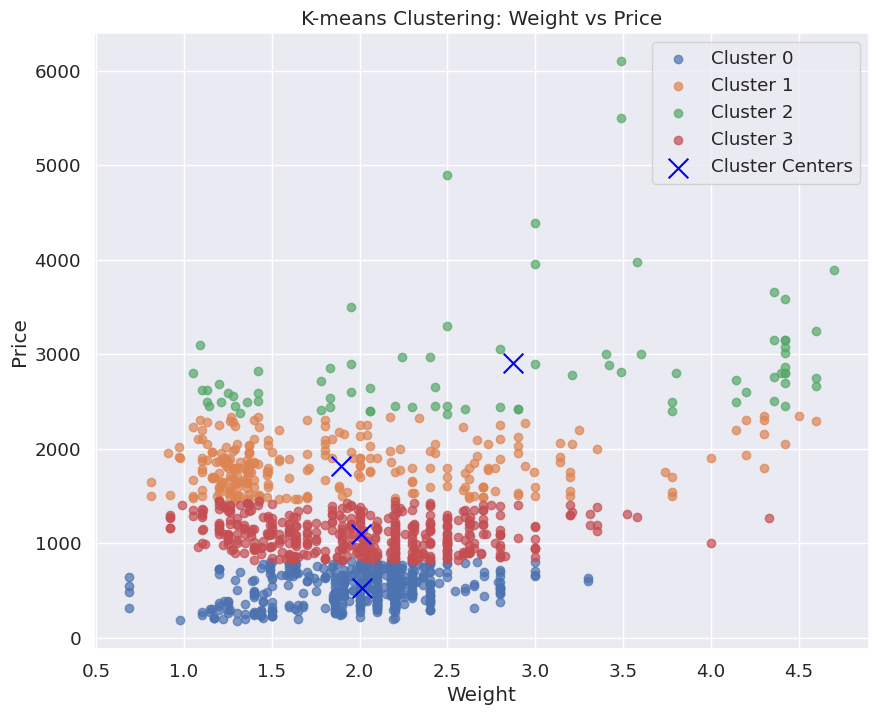

In [58]:
KMeans_Clustering(data)

In [41]:
print(f'the shape of x_train :{x_train.shape}')
print(f'the shape of y_train :{y_train.shape}')
print(f'the shape of x_test :{x_test.shape}')
print(f'the shape of y_test :{y_test.shape}')

the shape of x_train :(976, 14)
the shape of y_train :(976,)
the shape of x_test :(326, 14)
the shape of y_test :(326,)


## Model Building

In [64]:
def model_building_random_forest(x_train,x_test,y_train,y_test):
    model1= RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
    model1.fit(x_train,y_train)

    y_pred=model1.predict(x_test)

    print('R2 score',r2_score(y_test,y_pred))
    print(f'MAE :{mean_absolute_error(y_test,y_pred)}')  



In [65]:
model_building(x_train,x_test,y_train,y_test)

R2 score 0.8766261495009774
MAE :0.16031794301487828


In [66]:
from sklearn.tree import DecisionTreeRegressor
def model_building_decisionTree(x_train,x_test,y_train,y_test):
    model2 = DecisionTreeRegressor(random_state=42)
    model2.fit(x_train, y_train)

    y_pred = model2.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print('R2 score:', r2)
    print('MAE:', mae)


In [67]:
model_building_decisionTree(x_train,x_test,y_train,y_test)

R2 score: 0.7626113797077745
MAE: 0.21774764116992762


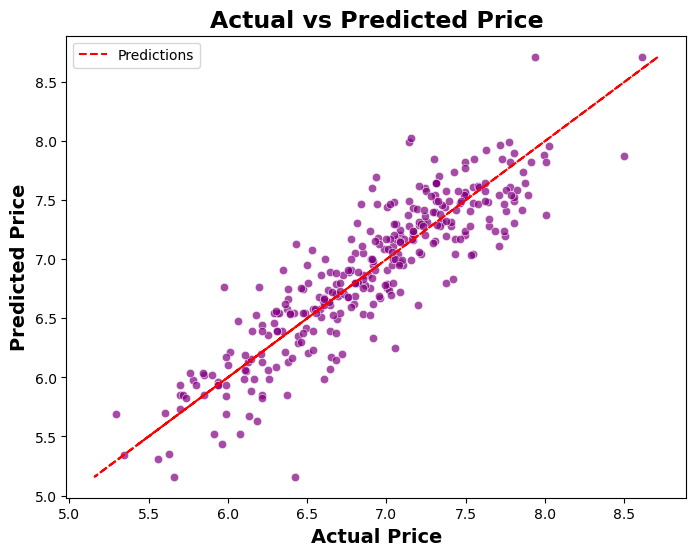

In [52]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.legend()
plt.show()